In [351]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM




In [352]:
path = '/home/relka/Descargas/Diplomado_Oficial/Módulo 6 - Redes Neuronales profundas/Proyecto1/all_stocks_5yr.csv'
df = pd.read_csv(path)
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [353]:
df.nunique()

date        1259
open       49715
high       81499
low        82354
close      51151
volume    586441
Name         505
dtype: int64

In [354]:
df.shape

(619040, 7)

In [355]:
df = df.dropna()

In [356]:
df.isna().sum() 

date      0
open      0
high      0
low       0
close     0
volume    0
Name      0
dtype: int64

In [357]:
df.head(100)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
95,2013-06-26,16.50,16.64,16.17,16.17,3604500,AAL
96,2013-06-27,16.29,16.34,16.00,16.31,3566000,AAL
97,2013-06-28,16.24,16.55,16.16,16.42,7063900,AAL
98,2013-07-01,16.50,17.04,16.48,16.80,4666900,AAL


In [358]:
df['date'] = pd.to_datetime(df['date'])

In [359]:
df.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [360]:
df.describe()

,date,open,high,low,close,volume
count,619029,619029.000000,619029.000000,619029.000000,619029.000000,6.190290e+05
mean,2015-08-18 00:45:31.033280,83.023334,83.778419,82.256200,83.043305,4.321892e+06
min,2013-02-08 00:00:00,1.620000,1.690000,1.500000,1.590000,1.010000e+02
25%,2014-05-20 00:00:00,40.220000,40.620000,39.830000,40.240800,1.070351e+06
50%,2015-08-21 00:00:00,62.590000,63.150000,62.020000,62.620000,2.082165e+06
75%,2016-11-15 00:00:00,94.370000,95.180000,93.540000,94.410000,4.284550e+06
max,2018-02-07 00:00:00,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08
std,NaN,97.378769,98.207735,96.507634,97.388913,8.693671e+06


In [361]:
numeric_df = df.select_dtypes(include=[np.number])

In [362]:
corr_matrix = numeric_df.corr()

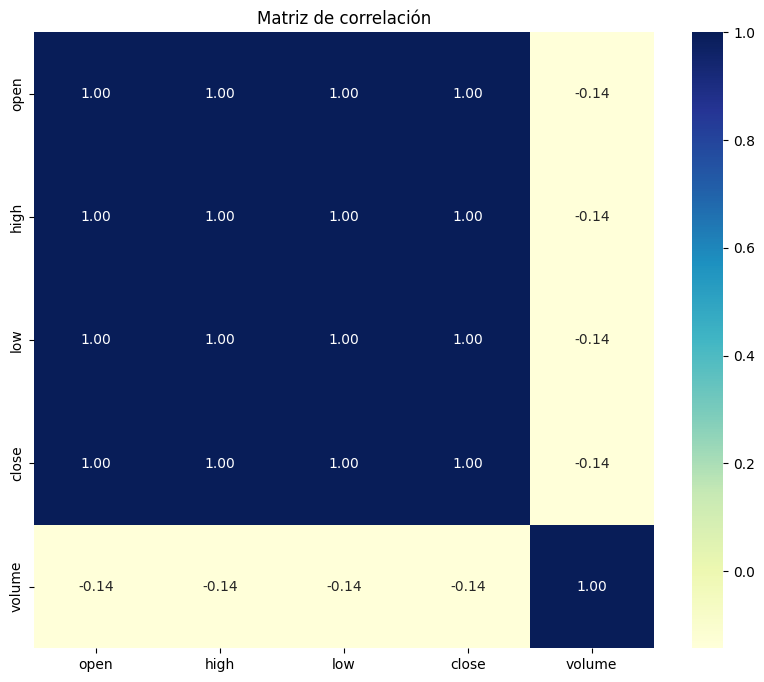

In [363]:
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Matriz de correlación')
plt.show()

In [364]:
# Proyecto 1 - Redes Neuronales Profundas
# Para este dataset vamos a predecir el cierre del precio de una
# accion usando LSTM. 

# by: Luis Héctor Camarillo Amador

app_data = df[df['Name'].str.upper() == 'AAPL']
app_data.head(500)


,date,open,high,low,close,volume,Name
1259,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1260,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
1261,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
1262,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
1263,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
1754,2015-01-28,117.6250,118.1200,115.3100,115.3100,146477063,AAPL
1755,2015-01-29,116.3200,119.1900,115.5600,118.9000,84436432,AAPL
1756,2015-01-30,118.4000,120.0000,116.8500,117.1600,83745461,AAPL
1757,2015-02-02,118.0500,119.1700,116.0800,118.6300,62739100,AAPL


In [365]:
print(app_data.shape)

(1259, 7)


In [366]:
# Scale the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(app_data[['close']])
X = data_scaled[:-1]
y = data_scaled[1:]

# Split the data into 80% training and 20$ testing
train_size = int(len(X)*0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [367]:
len(X_train)

1006

In [368]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [369]:
model = Sequential([
    LSTM(256, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

/home/relka/Descargas/OneDrive_1_27-3-2025/Python/.venv/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [370]:
model.compile(loss='mse')

In [371]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

In [372]:
loss = model.evaluate(X_test, y_test)
print(f'Test loss: {loss}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8336e-04 
Test loss: 0.00026218185666948557


In [373]:
y_pred = model.predict(X_test)
y_pred.shape

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


(252, 1)

In [374]:
print(y_pred)

[[0.6143637 ]
 [0.6186022 ]
 [0.6217614 ]
 [0.61926717]
 [0.6289939 ]
 [0.6432089 ]
 [0.6472146 ]
 [0.6458659 ]
 [0.64893126]
 [0.6569466 ]
 [0.66030174]
 [0.6555557 ]
 [0.6566193 ]
 [0.6588287 ]
 [0.6593197 ]
 [0.6822583 ]
 [0.67545325]
 [0.68217635]
 [0.6785682 ]
 [0.6800441 ]
 [0.6757811 ]
 [0.6731586 ]
 [0.6769286 ]
 [0.6774205 ]
 [0.67569906]
 [0.6877548 ]
 [0.6896425 ]
 [0.68389875]
 [0.69596416]
 [0.6826684 ]
 [0.6956357 ]
 [0.6915303 ]
 [0.68923205]
 [0.6912019 ]
 [0.7151957 ]
 [0.71782845]
 [0.71626514]
 [0.71404403]
 [0.71437305]
 [0.7231776 ]
 [0.71700567]
 [0.71404403]
 [0.71141225]
 [0.7100144 ]
 [0.6973601 ]
 [0.6987563 ]
 [0.69259757]
 [0.6990027 ]
 [0.6938291 ]
 [0.68956035]
 [0.704014  ]
 [0.7026171 ]
 [0.7138795 ]
 [0.7212023 ]
 [0.71420854]
 [0.7151134 ]
 [0.7139618 ]
 [0.7380864 ]
 [0.74575526]
 [0.7420439 ]
 [0.7376743 ]
 [0.75772345]
 [0.7912149 ]
 [0.7993328 ]
 [0.79328513]
 [0.7990013 ]
 [0.81683284]
 [0.81351304]
 [0.8116047 ]
 [0.7683826 ]
 [0.7873239 ]
 [0.79

In [375]:
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)


Text(0.5, 1.0, 'Grafica y_test vs y_pred')

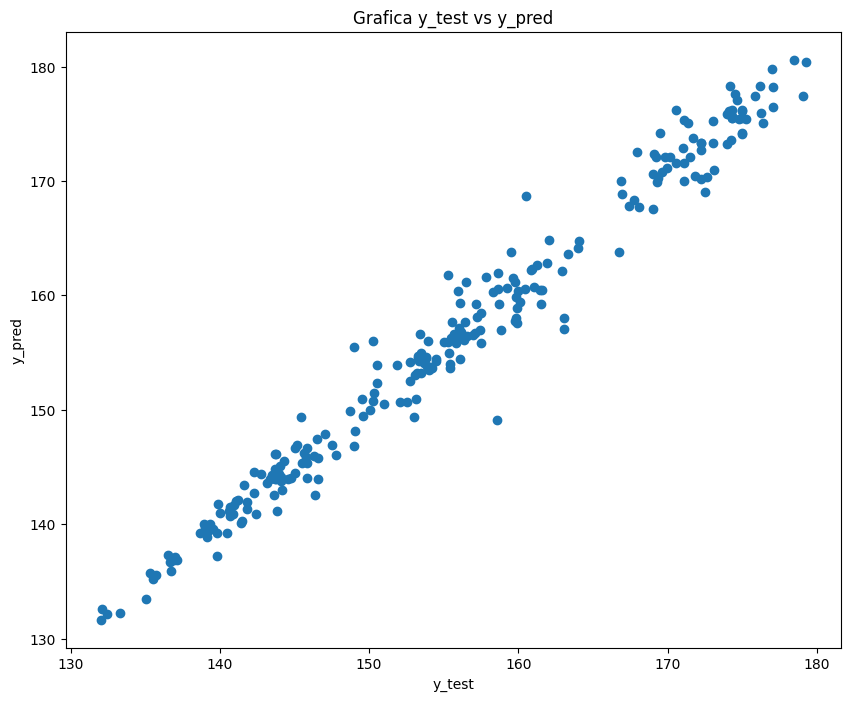

In [376]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')    
plt.title('Grafica y_test vs y_pred')

In [377]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calcular RMSE (Raíz del Error Cuadrático Medio)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

# Calcular MAE (Error Absoluto Medio)
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

# Calcular R² (Coeficiente de Determinación)
r2 = r2_score(y_test, y_pred)
print(f'R²: {r2}')

RMSE: 1.9992320629010236
MAE: 1.4150803677997899
R²: 0.9735197468056359


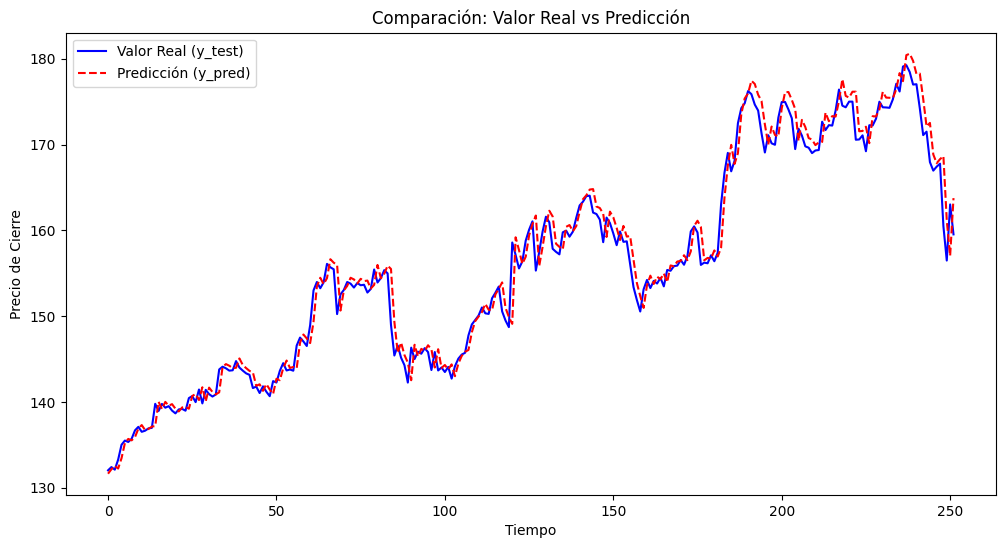

In [378]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Valor Real (y_test)', color='blue')
plt.plot(y_pred, label='Predicción (y_pred)', color='red', linestyle='--')
plt.xlabel('Tiempo')
plt.ylabel('Precio de Cierre')
plt.title('Comparación: Valor Real vs Predicción')
plt.legend()
plt.show()